In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Grid World

In [ ]:
class Grid():
    def __init__(self , rows , cols , start):
        self.rows = rows
        self.cols = cols
        self.start = start
        self.i = start[0]
        self.j = start[1]

    def set(self, actions , rewards):
        self.actions = actions
        self.rewards = rewards

    def reset(self):
        self.i  , self.j = self.start

    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]

    def is_terminal(self, s):
        return s in self.rewards

    def current_state(self):
        return (self.i , self.j)

    def all_states(self):
        return set(self.actions.keys()) | set(self.rewards.keys())

    def move(self , a):
        if a in self.actions[(self.i , self.j)]:
            if a == "U":
                self.i -= 1

            elif a == "D":
                self.i += 1

            elif a == "R":
                self.j += 1

            elif a == "L":
                self.j -= 1
        
        return self.rewards.get((self.i , self.j) , 0)

    def game_over(self):
        return (self.i , self.j) in self.rewards

In [ ]:
def initialize_grid():
    rows , cols = 3 , 4
    start = (2 , 0)
    g = Grid(rows , cols , start)
    
    # reward for termination state
    rewards = {(0, 3): 1 , (1 , 3) : -1}
    
    # possible actions can be performed for each state
    actions = {
              (0, 0):["D" , "R"],
              (0, 1):["R"],
              (0, 2):["R"],
              (1, 0):["U" ,"D"],
              (1, 2):["U" ,"D" ,"R"],
              (2, 0):["U" , "R"],
              (2, 1):["R" , "L"],
              (2, 2):["R" , "L" ,"U"],
              (2, 3):["L" , "U"]
    }

    g.set(actions , rewards)

    return g

## Visualization Functions

In [ ]:
def print_values(V, g):
    print("Printing Values")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="") # -ve sign takes up an extra space
        print("")


def print_policy(P, g):
    print("Printing Policy")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i,j), ' ')
            print("  %s  |" % a, end="") 
        print("")

In [ ]:
## Define Epsilon Greedy random action
def random_action(a , eps = 0.3):
    if np.random.random() < (1 - eps) :
        return a
    else:
        # print("random choice")
        return np.random.choice(ACTION_SPACE)

In [ ]:
# function for finding maximum value and its corresponding key in dictionary
def max_dict(d):
    # find max val
    max_val = max(d.values())

    # find keys corresponding to max val
    for key , val in d.items():
        # print(key)
        if val == max_val:
            max_key = key
            break

    return max_key , max_val

## Initialize Grid

In [ ]:
grid = initialize_grid()
ACTION_SPACE = ("U" , "D" , "R" , "L")
gamma = 0.9

## Initialize Policy

In [ ]:
Policy = {}
for i in grid.actions.keys():
    Policy[i] = np.random.choice(ACTION_SPACE)

## Initialize Q values

In [ ]:
Q = {}
sample_counts = {}

for s in grid.all_states():
        Q[s] = {}
        sample_counts[s] = {}
        for a in ACTION_SPACE:
            Q[s][a] = 0.0
            sample_counts[s][a] = 0.0

## Both policy improvement and Policy evaluation at the same step

iteration  0
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  L  |  L  |
iteration  1000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  L  |  L  |
iteration  2000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |
iteration  3000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |
iteration  4000
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  L  |  U  |  L  |
iteration  5000
Printing Policy
----------------

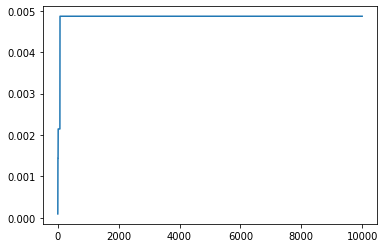

In [ ]:
delta = []
gamma = 0.9
biggest_change = 0
alpha = 0.3
eps = 1
epochs = 10000

for it in range(epochs):

    # scaling epsilon value to increase randomness
    if it%100 == 0:
        eps -= 0.01 
        # eps = max(0 , eps)
        # print(eps)

    if it%1000 == 0:
        print("iteration " , it)
        for sv in grid.actions.keys():
            Policy[sv] , _ = max_dict(Q[sv])
        print_policy(Policy , grid)
    
    grid.reset()
    s = grid.current_state()
    a = random_action(max_dict(Q[s])[0] , eps = eps)

    while not grid.game_over():
        #Only the Next state action is random
        # perform action and get next state + reward
        r = grid.move(a)
        
        s2 = grid.current_state()

        # choosing random action greedily
        a2 = random_action(max_dict(Q[s2])[0] , eps = eps)

        #update Q
        old_q = Q[s][a]
        sample_counts[s][a] += 1
        Q[s][a] = Q[s][a] + (r + gamma*Q[s2][a2] - Q[s][a])/sample_counts[s][a]  # running Q mean
        biggest_change = max(biggest_change , np.abs(old_q - Q[s][a]))

        s = s2
        a = a2

    delta.append(biggest_change)

plt.plot(delta)

V = {}
for sv in grid.actions.keys():
    Policy[sv] , V[sv] = max_dict(Q[sv])

print_policy(Policy , grid)
print_values(V ,grid)